In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Lets plot heat map to check correlation between the Columns.

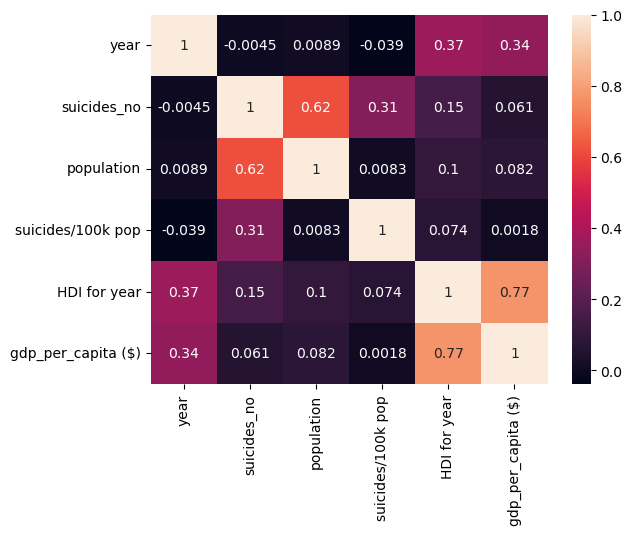

In [219]:
correlation_matrix= df[['year','suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Questions
#### 1) Is the suicide rate more prominent in some age categories than others?

In [7]:
#age groups/categories and their count
df['age'].value_counts()

age
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

So we have six categories

Suicide rate column is given which is suicides/100k pop 

Basically we will be using group by where we will select age groups and we will apply sum and mean functions on 'suicide/100k pop' column to get suicide rate insight in every age group.


In [108]:
suicide_rate_sum= df.groupby('age', as_index=False)['suicides/100k pop'].sum()
suicide_rate_sum

,age,suicides/100k pop
0,15-24 years,41532.69
1,25-34 years,56571.52
2,35-54 years,69386.02
3,5-14 years,2858.39
4,55-74 years,74994.20
5,75+ years,111201.01


##### Lets Visualize with Bar Plot understand in a better way

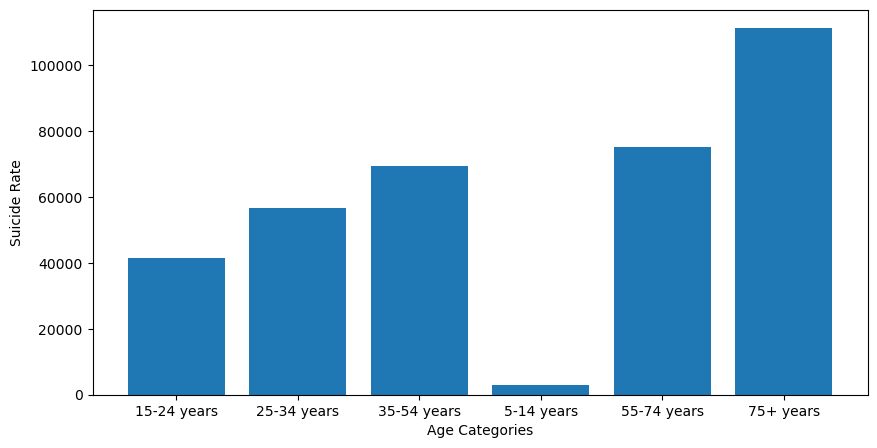

In [122]:
plt.figure(figsize=(10,5))
plt.bar(suicide_rate_sum['age'], suicide_rate_sum['suicides/100k pop'])
plt.xlabel('Age Categories')
plt.ylabel('Suicide Rate')
plt.show()

Lets also find Total Number of Suicides done by each age group.

We will use group by and will perform sum function on Number of Suicides Column.

In [143]:
df.groupby('age')['suicides_no'].sum().to_frame()

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


##### 2452141 is highest and it is of group 35-54...

### As you can see from sum of the suicides/100 pop(  "Suicide rate"), it is higher in 75+ year people and with age it reduces much and lowest suicide rate is in youngest age catregory..

#### 2) Which countries have the most and the least number of suicides??

We will consider countries and Suicide no column to answer this question.

Firstly lets get the maximum number of Suicides by grouping Country column with suicide no and perfrom sum() and max() function on suicide number.

In [232]:
#Firstly lets get the maximum number of Suicides by grouping Country column with suicide no and perfrom sum() and max() function on suicide number.
print('Maximum number of Suicides: ',df.groupby('country')['suicides_no'].sum().max())

#Now to get Country Name associated with Max Suicide Number we will use idxmax() function.
print('Country having maximum number of Suicides: ', df.groupby('country')['suicides_no'].sum().idxmax())



Maximum number of Suicides:  1209742
Country having maximum number of Suicides:  Russian Federation


#### Now Coming to Minimum Number of Suicide Number.

Firstly lets see what is minimum number of suicide.

In [233]:
#Firstly lets see what is minimum number of suicide.
print('Minimum number of Suicides: ',df.groupby('country')['suicides_no'].sum().min())

print('Country having Minimum number of Suicides: ', df.groupby('country')['suicides_no'].sum().idxmin())

Minimum number of Suicides:  0
Country having Minimum number of Suicides:  Dominica


#### So Country with maximum suicide number is Russian Fedration and counrty with minimum suicde number is Dominica.

#### 3) What is the effect of the population on suicide rates?

So basically in this question we will try to find that Is population is effecting the Suicide rate means does more population lead to more suicide rate and countries with less population have less suicide rate...or any other relation.

We will consider suicide rate and population columns of the dataset to get the relation and insight behind them.

Lets plot Population vs Suicide Rate Graph to get some insights:

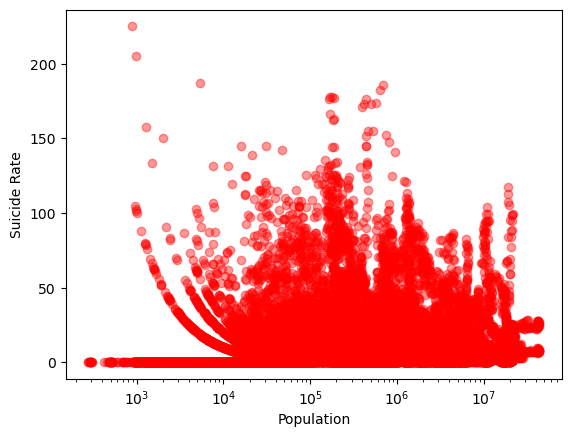

In [264]:
plt.scatter(df['population'],
            df['suicides/100k pop'],
            c = 'red',
            alpha=0.4)

plt.xlabel('Population')
plt.ylabel('Suicide Rate')
#to scale x-axis
plt.xscale('log')
plt.show()

Lets firstly see what is the population of country with the highest suicide rate.

In [152]:
#lets take sum of suicide rate for every country and findout which one has the highest suicide rate over the years
highest_suicide_rate_country= df.groupby('country')['suicides/100k pop'].sum().idxmax()
#Population of Country having Highest Suicide Rate:
higest_suicide_rate_total_pop = df.loc[df['country'] == highest_suicide_rate_country]['population'].sum()
#Total Highest Suicide Rate of the Country:
total_suicide_rate= df.loc[df['country'] == highest_suicide_rate_country]['suicides/100k pop'].sum()

print('Country with Highest Suicide Rate is: ', highest_suicide_rate_country)
print('Population of Country with Highest Suicide Rate: ', higest_suicide_rate_total_pop)
print('Total Suicide Rate of country having highest suicide rate: ', total_suicide_rate)

Country with Highest Suicide Rate is:  Russian Federation
Population of Country with Highest Suicide Rate:  3690802620
Total Suicide Rate of country having highest suicide rate:  11305.130000000001


Lets check which country has highest popluation and how it is effecting suicide rate

In [154]:
Highest_populated_coutnry= df.groupby('country')['population'].sum().idxmax()
#Lets check the suicide rate of highest popluated country
suicide_rate_of_highest_pop_country= df.loc[df['country'] == Highest_populated_coutnry]['suicides/100k pop'].sum()
#population number of highest populated country
total_pop = df.loc[df['country'] == Highest_populated_coutnry]['population'].sum()

print('Country with Highest Population is: ', Highest_populated_coutnry)
print('Total Suicide rate of Highest Populated Country: ', suicide_rate_of_highest_pop_country)
print('Population of Country with Highest Population Number: ', total_pop )

Country with Highest Population is:  United States
Total Suicide rate of Highest Populated Country:  5140.969999999999
Population of Country with Highest Population Number:  8054027201


In [166]:
#difference of population between highest populated country and country with highest suicide rate
diff = total_pop - higest_suicide_rate_total_pop
#difference of suicde rate between highest populated and higest suicide rate country
diff_suicide_rate= suicide_rate_of_highest_pop_country - total_suicide_rate
print('Difference of population between highest populated country and country with highest suicide rate: ',diff)
print('Difference of suicde rate between highest populated and higest suicide rate country: ', diff_suicide_rate)

Difference of population between highest populated country and country with highest suicide rate:  4363224581
Difference of suicde rate between highest populated and higest suicide rate country:  -6164.160000000002


#### That is a big positive difference between population and negative difference between suicide rates that shows that Highest Population is not a major cause of high suicide rate....

Now finding Effect of Minimum Population Country and its Suicide Rate

In [150]:
#finding out name of country having the Minimum population
name_of_minimum_populated= df.groupby('country')['population'].sum().idxmin()
#finding the population number of minimum populated country
min_total_pop = df.loc[df['country'] == name_of_minimum_populated]['population'].sum()
#finding total suicide rate of lowes populated
suicide_rate_of_lowest_populated= df.loc[df['country'] == name_of_minimum_populated]['suicides/100k pop'].sum()

#printing information
print('Name of Lowest Populated Country: ', name_of_minimum_populated)
print('Population of Lowesat Populated Country: ', Dominica_total_pop)
print('Suicide rate of Lowest Populated Country: ', suicide_rate_of_lowest_populated)

Name of Lowest Populated Country:  Dominica
Population of Lowest Populated Country:  66400
Suicide rate of Lowest Populated Country:  0.0


#### If we see lowest populated country it do have lowest suicide rate but It might not be the case for every low populated country if we take insight from graph.

# From above Graph, Heatmap and all the values we had, it is very clear that Population have very little effect on Suicide rate, 
#### I mean that Suicide rate is not highly effected due high Population in the Countries (Not increasing majorly due to increase in population) because we can also see some countries with high population but low suicide rate like United States which is most populated country in the dataset.

#### 4) What is the effect of the GDP of a country on suicide rates?

In this one we will consider the country and  gdp_per_capita($) column to get the insight.

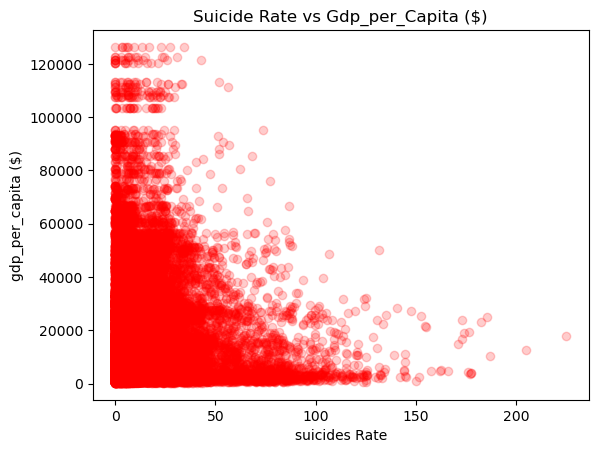

In [226]:
plt.scatter(df['suicides/100k pop'],
            df['gdp_per_capita ($)'],
            c = 'red'
            ,alpha=0.2)

plt.title('Suicide Rate vs Gdp_per_Capita ($)')
plt.xlabel('suicides Rate')
plt.ylabel('gdp_per_capita ($)')
plt.show()

### We are seeing Effect of gpd_per_capita on suicide rate , as you can when Suicide rate is low, gpd_per_capita is pretty high. And when Suicide Rate start Increasing gpd_per_capita is coming down with it.
###### Countries with High Suicide rate are having low gpd_per_capita in the graph. That shows the effect of Gpd_per_Capita on Suicide rate or Vice Versa.

#### 5)  What is the trend of suicide rates across all the years?


So to see the trend lets plot the Average Suicide Rate against the years. We will take average of suicide rate over the years firstly. And then we will plot.

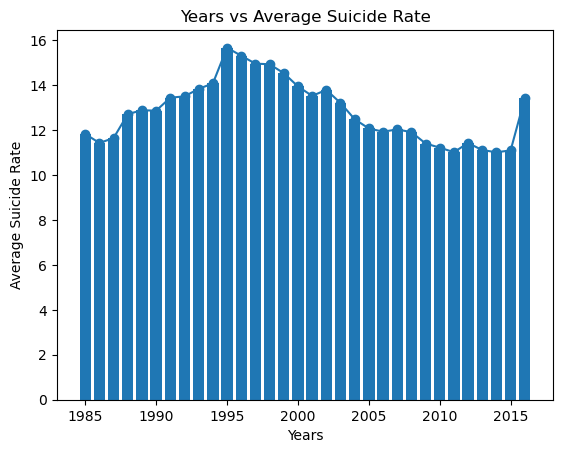

In [266]:
trend = df.groupby('year', as_index=False)['suicides/100k pop'].mean()
plt.bar(trend['year'], trend['suicides/100k pop'])
#we can plot a line graph to represent the overall trend
plt.plot(trend['year'], trend['suicides/100k pop'], linestyle= '-', marker= 'o')
plt.xlabel('Years')
plt.ylabel('Average Suicide Rate')
plt.title('Years vs Average Suicide Rate')
plt.show()

# From the above graph we can see upward trend till 1995 and then there is downward trend till the very last where a upward spike is present.

#### 6) Is there a difference between the suicide rates of men and women?

In [236]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


So we have sex column for male and female. And other column that we will consider is Suicide Rate.

In [257]:
male_female_trend = df.groupby('sex', as_index=False)['suicides/100k pop'].mean()
male_female_trend

,sex,suicides/100k pop
0,female,5.392866
1,male,20.239329


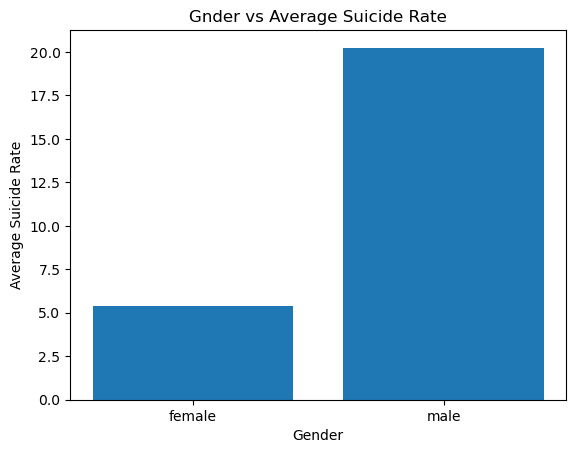

In [259]:
plt.bar(male_female_trend['sex'], male_female_trend['suicides/100k pop'])
plt.xlabel('Gender')
plt.ylabel('Average Suicide Rate')
plt.title('Gnder vs Average Suicide Rate')
plt.show()

### Lets plot stripplot to see the Male and Female Suicide Rates.

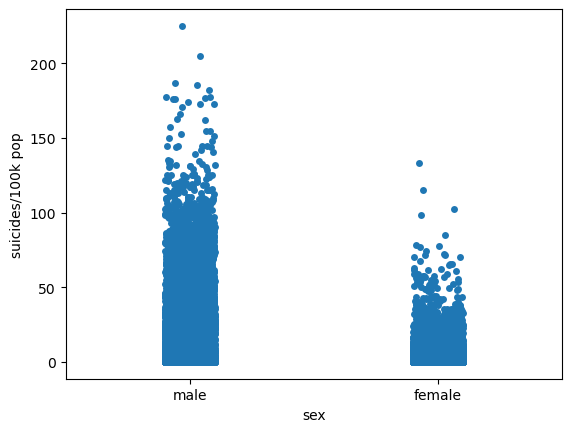

In [261]:
sns.stripplot(x= 'sex', y='suicides/100k pop', data= df,  jitter=True)
plt.show()

##### Lets also plot Violin plot to see distribution of points for both male and female.

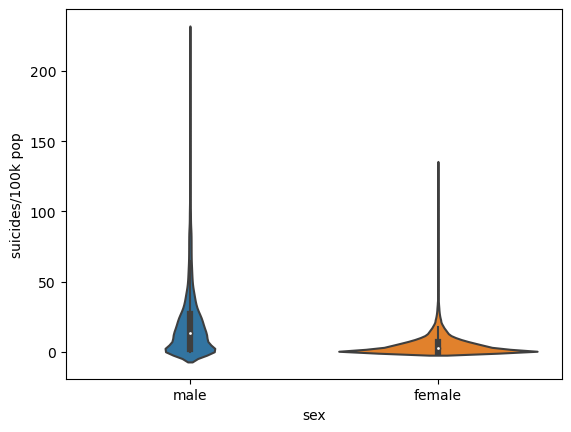

In [237]:
sns.violinplot(x= 'sex', y='suicides/100k pop', data = df)
plt.show()

## As you can see from graphs that there is a prominent difference between the suicide rate of male and female, Suicide rate of Male is very higher than the female suicide rate